In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pretty_plots

n_procs = 6
Ng = 12
n_grid_points = Ng*Ng*Ng

my_grid_points = int(n_grid_points / n_procs)

In [13]:
procs = []

steps = ["step0","step1","step2","step3","step4","step5","step6","step7","step8","step9","step10"]

for i in range(n_procs):
    procs.append({})
    filename = "proc" + str(i)
    with open(filename,"r") as f:
        lines = f.read().splitlines()
    
    procs[i]["id"] = lines[0]
    lines = lines[1:]

    while len(lines) > 0:
        step = lines[1:][:my_grid_points]

        procs[i][lines[0]] = np.array([[int(j) for j in i.split(",")] for i in step])

        lines = lines[1:][my_grid_points:]

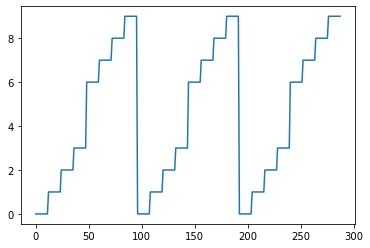

In [14]:
step = "step1"
coords = procs[0][step]
ids = (coords[:,0] * Ng * Ng + coords[:,1] * Ng + coords[:,2])
indexes = np.arange(len(ids))
dims = np.array([3,2,1])
local_grid_size = np.array([4,6,12])

lineid = indexes // local_grid_size[0]
nlines = local_grid_size[1] * local_grid_size[2]


plt.plot(coords[:,1])
plt.savefig("3_2_1" + step + ".jpg")


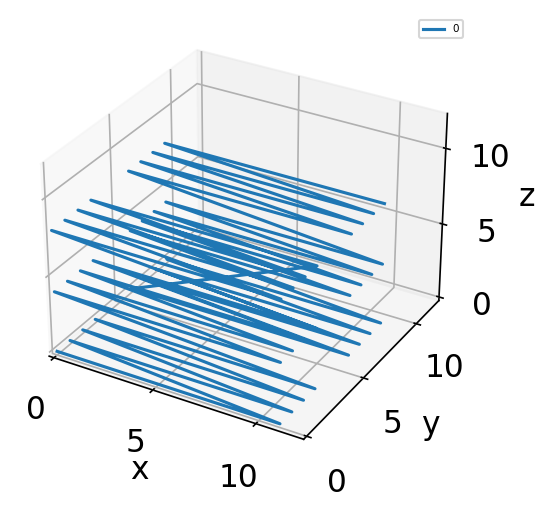

In [124]:
pretty_plots.plot_pretty()

step = "step6"

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for idx,proc in enumerate(procs[0:1]):
    coords = proc[step]
    xs = coords[:,0]
    ys = coords[:,1]
    zs = coords[:,2]

    ax.plot(xs,ys,zs,label=str(idx))

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.set_xlim(0,Ng)
ax.set_ylim(0,Ng)
ax.set_zlim(0,Ng)

plt.legend()
plt.show()